####  Batch Size of 32

In [1]:
from  torchvision import datasets
from torch.utils.data import DataLoader, Dataset
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.optim import SGD

In [2]:
data_folder = "~/data/FMNIST"
fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)
tr_image = fmnist.data
tr_targets = fmnist.targets

In [3]:
val_fmnist = datasets.FashionMNIST(data_folder, download=True, train=False)
val_images = val_fmnist.data
val_targets = val_fmnist.targets

In [4]:
class MyDataset(Dataset):
    def __init__(self, x, y):
        super().__init__()
        x = x.float()/255
        x = x.view(-1, 28*28) # flatten it to 784 numeric values
        self.x, self.y = x, y
    def __getitem__(self, index):
        x, y = self.x[index], self.y[index]
        return x, y
    def __len__(self):
        return len(self.x)

In [5]:
# Fetch the data
def get_data():
    train = MyDataset(tr_image, tr_targets)
    trn_dl = DataLoader(train, batch_size=32, shuffle=True)
    val = MyDataset(val_images, val_targets)
    val_dl = DataLoader(val, batch_size=len(val_images), shuffle=False)
    return trn_dl, val_dl

# Define the model
def get_model():
    model = nn.Sequential(
        nn.Linear(28*28, 1000),
        nn.ReLU(),
        nn.Linear(1000, 10)
    )
    loss_fn = nn.CrossEntropyLoss()
    optimizer = SGD(model.parameters(), lr=0.01)
    return model, loss_fn, optimizer
    
# Define a function for training and validating the batch
def train_batch(x, y, model, opt, loss_fn):
    model.train()
    prediction = model(x)
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    optimizer = SGD(model.parameters(), lr=0.01)
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()


def accuracy(x, y, model):
    model.eval()
    with torch.no_grad():
        prediction = model(x)
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.tolist()


In [6]:
@torch.no_grad()
def val_loss(x, y, model):
    model.eval()
    prediction = model(x)
    loss_fn = nn.CrossEntropyLoss()
    val_loss = loss_fn(prediction, y)
    return val_loss.item()

In [7]:
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

In [8]:
# train the model
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []

In [9]:
for epoch in range(5):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    # loop through the batches of the training data and calculate the accuracy
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss)
    train_epoch_loss = np.array(train_epoch_losses).mean()
    
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model)
    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0
1
2
3
4


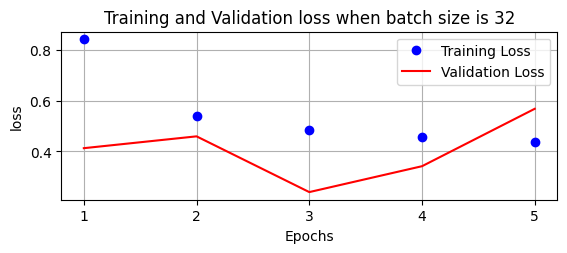

/var/folders/y5/5kc5fqvn2tncnl_868zg4zhr0000gn/T/ipykernel_35404/2825290212.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


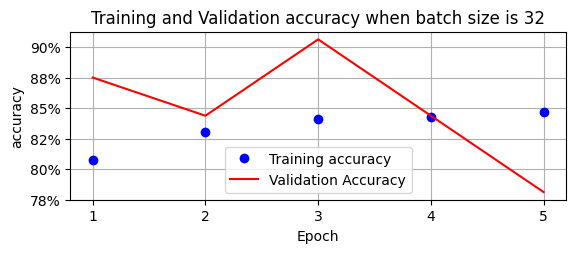

In [10]:
epochs = np.arange(5)+1
import matplotlib.ticker as mtick
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training Loss')
plt.plot(epochs, val_losses, 'r', label="Validation Loss")
plt.gca().xaxis.set_major_locator(mtick.MultipleLocator(1))
plt.legend()
plt.title("Training and Validation loss when batch size is 32")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.grid('off')
plt.show()

plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label="Training accuracy")
plt.plot(epochs, val_accuracies, 'r', label="Validation Accuracy")
plt.gca().xaxis.set_major_locator(mtick.MultipleLocator(1))
plt.title("Training and Validation accuracy when batch size is 32")
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.legend()
plt.grid('off')
plt.show()

### Batch Size of 1000

In [11]:
# Fetch the data
def get_data():
    train = MyDataset(tr_image, tr_targets)
    trn_dl = DataLoader(train, batch_size=1000, shuffle=True)
    val = MyDataset(val_images, val_targets)
    val_dl = DataLoader(val, batch_size=len(val_images), shuffle=False)
    return trn_dl, val_dl

In [12]:
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

In [13]:
# train the model
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []

In [14]:
for epoch in range(5):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    # loop through the batches of the training data and calculate the accuracy
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss)
    train_epoch_loss = np.array(train_epoch_losses).mean()
    
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model)
    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0
1
2
3
4


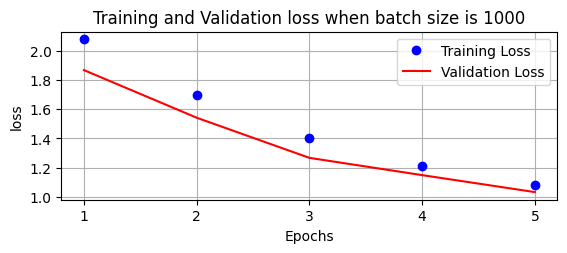

/var/folders/y5/5kc5fqvn2tncnl_868zg4zhr0000gn/T/ipykernel_35404/4082991985.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


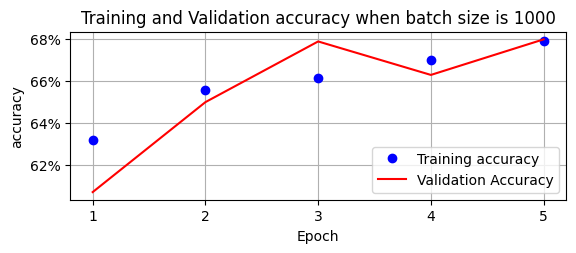

In [15]:
epochs = np.arange(5)+1
import matplotlib.ticker as mtick
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training Loss')
plt.plot(epochs, val_losses, 'r', label="Validation Loss")
plt.gca().xaxis.set_major_locator(mtick.MultipleLocator(1))
plt.legend()
plt.title("Training and Validation loss when batch size is 1000")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.grid('off')
plt.show()

plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label="Training accuracy")
plt.plot(epochs, val_accuracies, 'r', label="Validation Accuracy")
plt.gca().xaxis.set_major_locator(mtick.MultipleLocator(1))
plt.title("Training and Validation accuracy when batch size is 1000")
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.legend()
plt.grid('off')
plt.show()